# 有限体上の楕円曲線上の点の演算

　楕円曲線 $E:y^2=x^3+ax+b$ 上の相異なる2点 $P(x_1,y_1)$ と点 $Q(x_2,y_2)$ の2点を通る直線 $L$ の方程式は，
$x_1\ne x_2$の場合, 
$$y−y_1=\frac{y_1−y_2}{x_1-x_2}(x-x_1)$$
であり，楕円曲線 $E$ と直線 $L$ との交点の $x$座標は，次の3次方程式
$$\left(\frac{y_1−y_2}{x_1-x_2}(x-x_1)+y_1\right)^2=x^3+ax+b$$
を満たす。$x_1,\ x_2$ は当然この方程式を満たす筈である。

　3次方程式だから, $x_3$もこの方程式の解であるとすれば, 
$$(x-x_1)(x-x_2)(x-x_3)=0$$
と同じ方程式であるはずだから, $x^2$ の係数は $x_1+x_2+x_3$ となるはずだ。

　そこで, $x^2$ の係数を比べてみれば, 
$$ \left(\frac{y_1-y_2}{x_1-x_2}\right)^2=x_1+x_2+x_3$$
つまり, 
$$ x_3=\left(\frac{y_1-y_2}{x_1-x_2}\right)^2-(x_1+x_2)$$
と分かり,  $\displaystyle{y_3=\frac{y_1−y_2}{x_1-x_2}(x_3-x_1)+y_1}$ という事になる。

　$x_1=x_2$ の場合は,  $y_1\ne y_2$ の場合は, 2点を通る直線 $L$ の方程式は $x=x_1$ だから, 
同様に3つ目の点の座標を $(x_3,\ y_3)$ とすれば,  $x_3=x_1$ であり, $E:y^2=x^3+ax+b$ に代入して, 
$y^2=x_1^3+ax_1+b$ の $y$ の正負の解が, $y_1,\ y_2$ なので, $y_3$ はそのいずれでもないとすると無限遠点となる。

　$x_1=x_2$ で $y_1=y_2$ の場合は, $L$ は $E:y^2=x^3+ax+b$ 上の点 $(x_1,\ y_1)$ での接線を考える事となる。
$E$ の両辺を $x$ で微分すれば, 
$$ 2yy'=3x^2+a$$
$$ y'=\frac{3x^2+a}{2y}$$
だから, 点$(x_1,\ y_1)$での接線 $L$ の傾きは, $\displaystyle{\frac{{3x_1}^2+a}{2y_1}}$ で得られる。

　したがって, 接線 $L$ の方程式は, 
$$y−y_1=\frac{{3x_1}^2+a}{2y_1}(x-x_1)$$
となり, 同様の議論で, 楕円曲線 $E$ と直線 $L$ との共有点の $x$座標は，次の3次方程式
$$\left(\frac{{3x_1}^2+a}{2y_1}(x-x_1)+y_1\right)^2=x^3+ax+b$$
を満たす。$x_1$ は当然この方程式の重解となるということだ。

　3次方程式だから, $x_3$もこの方程式の解であるとすれば, 
$$(x-x_1)(x-x_1)(x-x_3)=0$$
と同じ方程式であるはずだから, $x^2$ の係数は $x_1+x_1+x_3=2x_1+x_3$ となるはずだ。

 そこで, $x^2$ の係数を比べてみれば, 
$$ \left(\frac{{3x_1}^2+a}{2y_1}\right)^2=2x_1+x_3$$
つまり, 
$$ x_3=\left(\frac{{3x_1}^2+a}{2y_1}\right)^2-2x_1$$
と分かり,  $\displaystyle{y_3=\frac{{3x_1}^2+a}{2y_1}(x_3-x_1)+y_1}$ という事になる。

　最後に $x_1=x_2$ だが $y_1\ne y_2$ という場合だ。この場合, 楕円曲線の形状より, 3つ目の共有点は「ない」と判断するところだろうが, ここに無限遠点を加えてそれを3つ目の共有点とする。つまり, $(x_3,\ y_3)=(\infty,\ \infty)$ というわけだ。
座標で扱うと気持ち悪いので, $(x_3,\ y_3)=\infty$ でも良い。
ただ, 以下のように プログラムで扱う場合は, どうしても $(\infty,\ \infty)$ となるのだろう。

In [2]:
using Plots,ImplicitEquations,LaTeXStrings,ImplicitPlots

上でライブラリの利用を設定。  
次で, 有限体 $GF(p)$ の位数 $p$ と楕円曲線 $y^2=x^3+ax+b$ の係数 $a,b$ を設定するルーチン（関数）の設定。返り値はない。

In [72]:
global p,a,b
p=0
function GFECset(tmpp,tmpa,tmpb)
    global p,a,b
    p,a,b=tmpp,tmpa,tmpb
end
f(x, y) = y^2 - (x^3 +a*x + b)
ff(x, y,k) = y^2 - (x^3 +a*x + b)+k*p
function ffdiv(a,b)
    ans=0
    while (ans*b)%p!=a%p && ans<p
        ans=ans+1
    end
    if ans>=p
        return -1
    else
        return ans
    end
end
GFECset(17,7,-7)
#GFECset(23,13,-13)
print([p,a,b])

[17, 7, -7]

次の処理は有限体上の割り算(**ffdiv**)がきちんと設定できているかどうかのチェック用。
確かめたい場合は **println** の行頭の「#」を外せば良い。

In [75]:
for a in 1:p-1
    divl=[]
    for b in 1:p-1
        append!(divl,ffdiv(a,b))
    end
#    println(divl)
end

**EllPlus** は有限体 $GF(p)$ 上の楕円曲線 $y^2=x^3+ax+b$ の点の加算で, 配列で与えた2点 **pp**,**qq** から **pp+qq** を配列で返す。

In [228]:
function EllPlus(pp,qq)# 無限遠点は[Inf,Inf]で, 但し, Inf=1/0で
    if pp[1]!=qq[1]
        m=ffdiv(qq[2]-pp[2],qq[1]-pp[1])
#        println("m = ",m)
        x=(m^2-(pp[1]+qq[1])+10*p)%p
#        println("x = ",x)
    else
        if pp[2]==qq[2]
            m=ffdiv((3*pp[1]^2+a+10*p)%p,(2*pp[2])%p)
#            println("** m = ",[(3*pp[1]^2+a+10*p)%p,(2*pp[2])%p,m])
            x=(m^2-2*pp[1]+10*p)%p
#            println("** x = ",x)
        else
            x=1/0
        end
    end
    if x>0 && x!=1/0
        y=(p*p-(m*(x-pp[1])+pp[2]))%p
#        y=p-y
    else 
        y=1/0
    end
    return [x,y]
end

EllPlus (generic function with 1 method)

次の関数 $GFEllPoints()$ は有限体 $GF(p)$ 上の楕円曲線 $y^2=x^3+ax+b$ 上の全ての点を配列で返す。

In [231]:
function GFEllPoints()
    plst=[]
    for x in 0:p-1,y in 0:p-1
        if f(x,y)%p==0
            append!(plst,[[x,y]])
        end
    end
    return plst
end
plst=GFEllPoints()
println(plst)

Any[[0, 1], [0, 28], [1, 1], [1, 28], [2, 6], [2, 23], [3, 5], [3, 24], [5, 11], [5, 18], [9, 5], [9, 24], [10, 11], [10, 18], [11, 4], [11, 25], [12, 8], [12, 21], [14, 11], [14, 18], [17, 5], [17, 24], [20, 8], [20, 21], [22, 10], [22, 19], [23, 9], [23, 20], [25, 12], [25, 17], [26, 8], [26, 21], [27, 13], [27, 16], [28, 1], [28, 28]]


関数 **GFEllAddChain(pp,qq)** は 2点 **pp**,**qq** から **qq** を加算することでできる点列を配列で返す。 

In [251]:
function GFEllAddChain(pp,qq,plst)
#    println(plst)
    vlst=[]
    rplst=[]
    rr=[]
    while pp in plst && !(pp in rplst)
        rr=EllPlus(qq,pp)
        if rr[1]==1/0
            append!(rplst,[pp])
            break
        end
        println(pp,"+",qq,"=",rr)
        if rr in plst
#            println(" ** ",pp,[pp,rr])
            append!(vlst,[[pp,rr]])
            append!(rplst,[pp])
            pp=rr
        else
            break
        end
    end
#    if rr in plst
        append!(vlst,[[pp,rr]])
#    end
    return rplst
end
pp,qq=[1,1],[1,1]
rplst=GFEllAddChain(pp,qq,plst)
println(rplst,",",length(rplst))
vlst=[]
for i in 1:length(rplst)-1
    append!(vlst,[[rplst[i],rplst[i+1]]])
end
println(vlst)

[1, 1]+[1, 1]=[28, 1]
[28, 1]+[1, 1]=[0.0, Inf]
Any[[1, 1]],1
Any[]


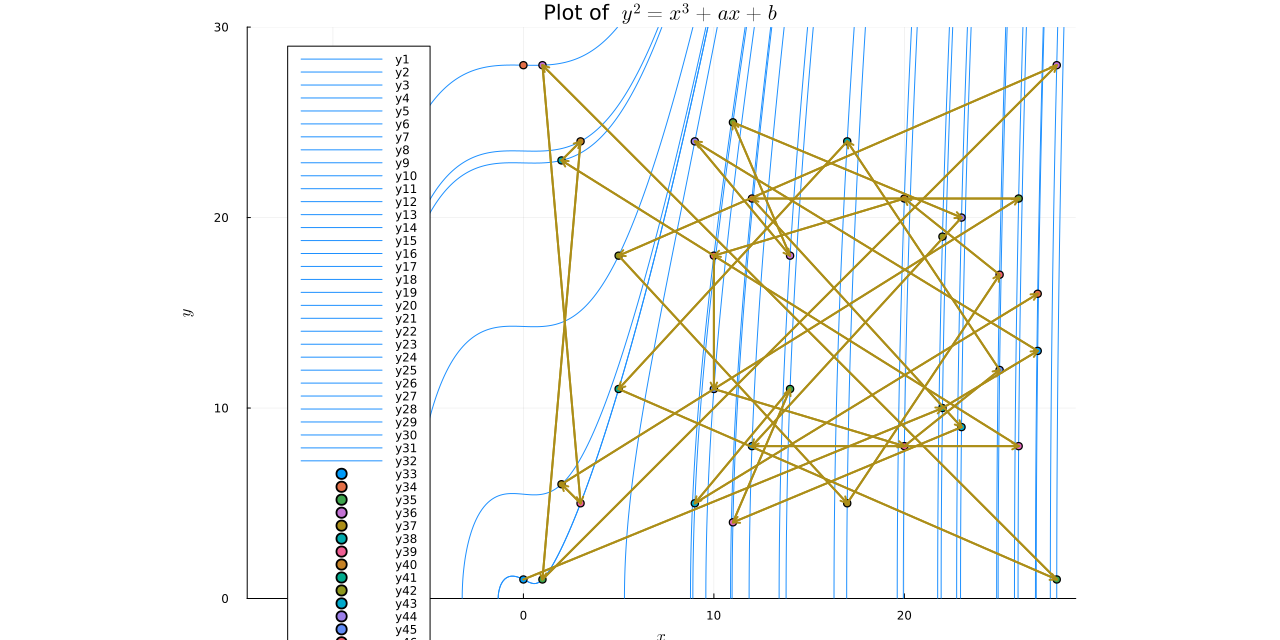

In [292]:
# プロット
#contour(-p:0.1:p,-p:0.1:p,(x,y)->f(x,y), levels=[0], xlabel=L"x", ylabel=L"y", title="Plot of  "*L"y^2= x^3 +ax + b",c= :blue)
#pl=plot(Eq(f,0),xlims=(-p, p),ylims=(0, p),aspect_ratio=:equal,size=(1280,640),c=:blue,xlabel=L"x", ylabel=L"y",title="Plot of  "*L"y^2 = x^3 +a x + b")
#p1=plot(f ⩵ 0,xlims=(-p, p),ylims=(0, p), size=(1280,640),aspect_ratio=:equal,c=:blue,xlabel=L"x", ylabel=L"y",title="Plot of  "*L"y^2 = x^3 +a x + b")
function GFEllPlot(p,a,b,plst,vlst)
#    println(p,",",a,",",b)
    p1=implicit_plot(f,xlims=(-p/2, p),ylims=(0, p+1), size=(1280,640),
                     aspect_ratio=:equal,c=:blue,xlabel=L"x", ylabel=L"y",title="Plot of  "*L"y^2 = x^3 +a x + b")
    for k in -2*p:p*p
        f(x, y) = y^2 - (x^3 +a*x + b)+k*p
        chk=false
        for e in plst
            x,y=e[1],e[2]
            if f(x,y)==0
                chk=true
                break
            end
        end
        if chk
            implicit_plot!(f,xlims=(-p/2, p),ylims=(0, p+1), size=(1280,640),
                            aspect_ratio=:equal,c=:blue,xlabel=L"x", ylabel=L"y",title="Plot of  "*L"y^2 = x^3 +a x + b")
        end
#        plot!(Eq(f,p*i),xlims=(-p, p),ylims=(0, p), size=(1280,640),aspect_ratio=:equal,c=:blue,xlabel=L"x", ylabel=L"y",title="Plot of  "*L"y^2 = x^3 +a x + b")
    end
    for i in 1:length(plst)
        px,py=plst[i][1],plst[i][2]
        scatter!([px],[py])
    end
#    scatter!([plst[6][1]-p],[plst[6][2]])
    quivlst=[[],[],[],[]]
    for v in vlst
#        println(v)
        append!(quivlst[1],v[1][1])
        append!(quivlst[2],v[1][2])
        append!(quivlst[3],v[2][1]-v[1][1])
        append!(quivlst[4],v[2][2]-v[1][2])
    end
    GR.setarrowsize(1/3)
#    println(quivlst)
    quiver!(quivlst[1], quivlst[2], quiver=(quivlst[3], quivlst[4]), lw = 2, as=0.1, xlims=(-p/2, p),ylims=(0, p+1), size=(1280,640))
    plot(p1)
#    savefig("20241007EllipA.png")
end
GFEllPlot(p,a,b,plst,vlst)

　さて, このファイルでは,  $p,a,b=17,7,-7$ としているので, 有限体は $GF(17)$ で, 楕円方程式は $y^2=x^3+7x-7$ となっている。
このとき, プログラムが正しければ, $(1,1)$ から始まる点の加算列は,  $[\infty,\infty]$ を合わせて $p=17$ 個となっている。
これは必ずそうなるものなのだろうか。  
　ただ, 加算列の様子を見ていると, $p,a,b=17,7,-7$ の場合は, 全ての点を巡らない。  
　そこで, 例えば $p,a,b=23,13,-13$ とすれば, 有限体 $GF(p)$ つまり, $GF(23)$ 上の楕円方程式 $y^2=x^3+13x-13$ 上の点は, $(1,1)$ を加算して一巡するのだ。
何が違うのだろう。

In [295]:
function GFEllCurvePoints(p,a,b,pp,qq)
    println("p=",p,", a=",a,", b=",b)
    GFECset(p,a,b)
    f(x, y) = y^2 - (x^3 +a*x + b)
    ff(x, y,k) = y^2 - (x^3 +a*x + b)+k*p
    plst=GFEllPoints()
    println("Points List :",plst)
#    pp,qq=[1,1],[1,1]
    rplst=GFEllAddChain(pp,qq,plst)
    vlst=[]
    for i in 1:length(rplst)-1
        append!(vlst,[[rplst[i],rplst[i+1]]])
    end
#    println(rplst,",",length(rplst))
#    println(vlst)
    GFEllPlot(p,a,b,plst,vlst)
end
GFEllCurvePoints(23,13,-13,[1,1],[1,1])


p=23, a=13, b=-13
Points List :Any[[1, 1], [1, 22], [5, 4], [5, 19], [10, 6], [10, 17], [11, 9], [11, 14], [12, 10], [12, 13], [16, 6], [16, 17], [18, 2], [18, 21], [19, 3], [19, 20], [20, 6], [20, 17]]
[1, 1]+[1, 1]=[16, 17]
[16, 17]+[1, 1]=[10, 17]
[10, 17]+[1, 1]=[18, 2]
[18, 2]+[1, 1]=[20, 6]
[20, 6]+[1, 1]=[5, 4]
[5, 4]+[1, 1]=[19, 20]
[19, 20]+[1, 1]=[11, 14]
[11, 14]+[1, 1]=[12, 10]
[12, 10]+[1, 1]=[12, 13]
[12, 13]+[1, 1]=[11, 9]
[11, 9]+[1, 1]=[19, 3]
[19, 3]+[1, 1]=[5, 19]
[5, 19]+[1, 1]=[20, 17]
[20, 17]+[1, 1]=[18, 21]
[18, 21]+[1, 1]=[10, 6]
[10, 6]+[1, 1]=[16, 6]
[16, 6]+[1, 1]=[1, 22]


$GF(37)$ で $y^2=x^3+17x-17$ でも一巡する... 

p=37, a=17, b=-17
Points List :Any[[1, 1], [1, 36], [2, 5], [2, 32], [4, 2], [4, 35], [7, 1], [7, 36], [11, 13], [11, 24], [12, 18], [12, 19], [13, 12], [13, 25], [18, 4], [18, 33], [22, 4], [22, 33], [24, 9], [24, 28], [25, 7], [25, 30], [27, 16], [27, 21], [28, 10], [28, 27], [29, 1], [29, 36], [33, 6], [33, 31], [34, 4], [34, 33]]
[1, 1]+[1, 1]=[24, 28]
[24, 28]+[1, 1]=[11, 13]
[11, 13]+[1, 1]=[22, 33]
[22, 33]+[1, 1]=[18, 33]
[18, 33]+[1, 1]=[25, 30]
[25, 30]+[1, 1]=[7, 1]
[7, 1]+[1, 1]=[29, 36]
[29, 36]+[1, 1]=[34, 4]
[34, 4]+[1, 1]=[28, 10]
[28, 10]+[1, 1]=[4, 35]
[4, 35]+[1, 1]=[33, 31]
[33, 31]+[1, 1]=[2, 5]
[2, 5]+[1, 1]=[13, 25]
[13, 25]+[1, 1]=[27, 21]
[27, 21]+[1, 1]=[12, 19]
[12, 19]+[1, 1]=[12, 18]
[12, 18]+[1, 1]=[27, 16]
[27, 16]+[1, 1]=[13, 12]
[13, 12]+[1, 1]=[2, 32]
[2, 32]+[1, 1]=[33, 6]
[33, 6]+[1, 1]=[4, 2]
[4, 2]+[1, 1]=[28, 27]
[28, 27]+[1, 1]=[34, 33]
[34, 33]+[1, 1]=[29, 1]
[29, 1]+[1, 1]=[7, 36]
[7, 36]+[1, 1]=[25, 7]
[25, 7]+[1, 1]=[18, 4]
[18, 4]+[1, 1]=[22

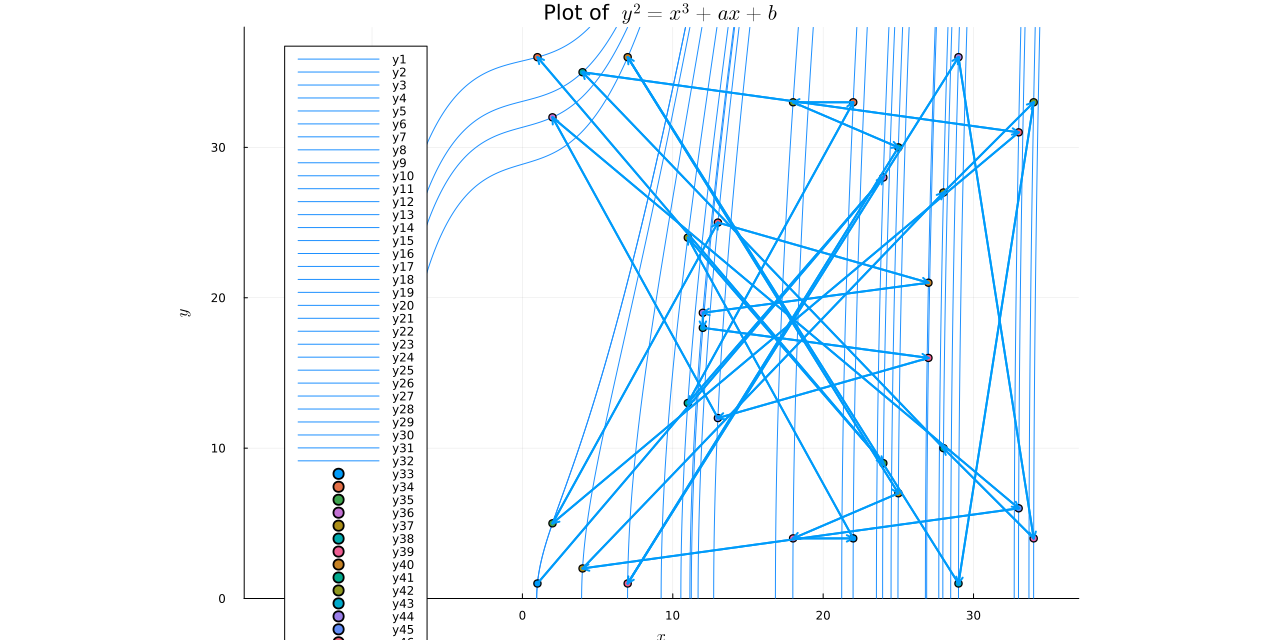

In [298]:
GFEllCurvePoints(37,17,-17,[1,1],[1,1])

# そもそも, 有限体上の楕円曲線上の点の加算って？

p=29, a=-1, b=1
Points List :Any[[0, 1], [0, 28], [1, 1], [1, 28], [2, 6], [2, 23], [3, 5], [3, 24], [5, 11], [5, 18], [9, 5], [9, 24], [10, 11], [10, 18], [11, 4], [11, 25], [12, 8], [12, 21], [14, 11], [14, 18], [17, 5], [17, 24], [20, 8], [20, 21], [22, 10], [22, 19], [23, 9], [23, 20], [25, 12], [25, 17], [26, 8], [26, 21], [27, 13], [27, 16], [28, 1], [28, 28]]
[0, 1]+[0, 1]=[22, 10]
[22, 10]+[0, 1]=[27, 13]
[27, 13]+[0, 1]=[9, 24]
[9, 24]+[0, 1]=[14, 18]
[14, 18]+[0, 1]=[11, 25]
[11, 25]+[0, 1]=[23, 20]
[23, 20]+[0, 1]=[12, 8]
[12, 8]+[0, 1]=[26, 8]
[26, 8]+[0, 1]=[2, 23]
[2, 23]+[0, 1]=[3, 24]
[3, 24]+[0, 1]=[1, 1]
[1, 1]+[0, 1]=[28, 28]
[28, 28]+[0, 1]=[5, 18]
[5, 18]+[0, 1]=[17, 5]
[17, 5]+[0, 1]=[25, 17]
[25, 17]+[0, 1]=[20, 21]
[20, 21]+[0, 1]=[10, 18]
[10, 18]+[0, 1]=[10, 11]
[10, 11]+[0, 1]=[20, 8]
[20, 8]+[0, 1]=[25, 12]
[25, 12]+[0, 1]=[17, 24]
[17, 24]+[0, 1]=[5, 11]
[5, 11]+[0, 1]=[28, 1]
[28, 1]+[0, 1]=[1, 28]
[1, 28]+[0, 1]=[3, 5]
[3, 5]+[0, 1]=[2, 6]
[2, 6]+[0, 1]=[

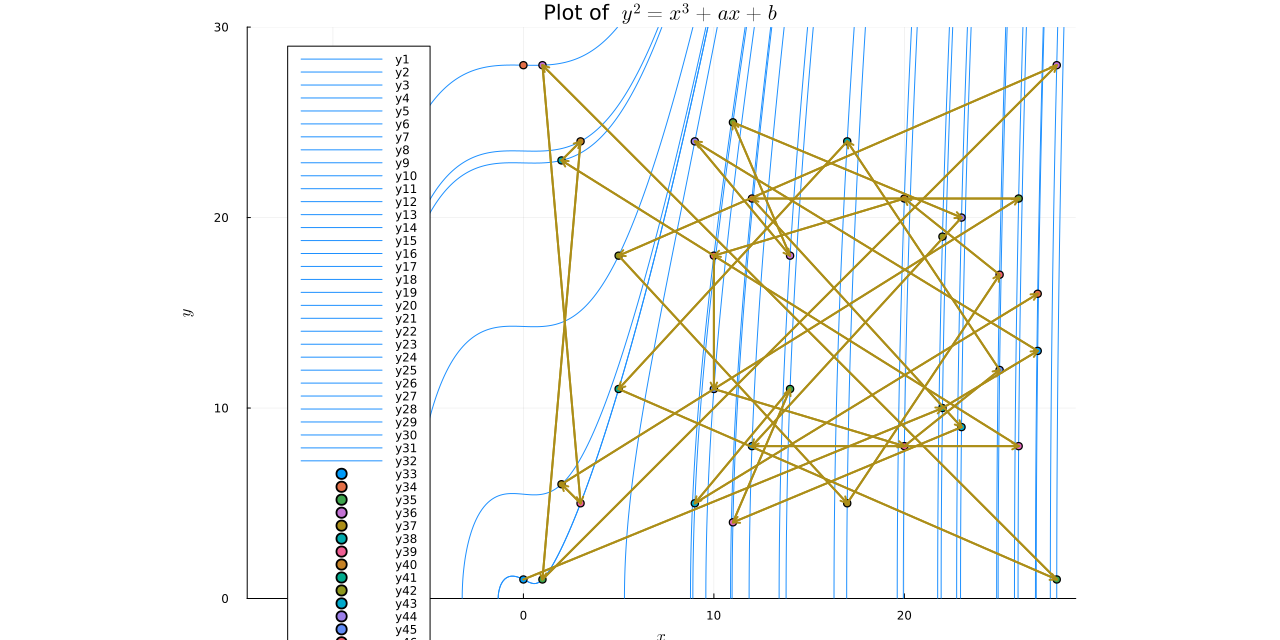

In [314]:
GFEllCurvePoints(29,-1,1,[0,1],[0,1])

In [303]:
GFEllAddChain([0,1],[0,1],plst)

[0, 1]+[0, 1]=[22, 10]
[22, 10]+[0, 1]=[27, 13]
[27, 13]+[0, 1]=[9, 24]
[9, 24]+[0, 1]=[14, 18]
[14, 18]+[0, 1]=[11, 25]
[11, 25]+[0, 1]=[23, 20]
[23, 20]+[0, 1]=[12, 8]
[12, 8]+[0, 1]=[26, 8]
[26, 8]+[0, 1]=[2, 23]
[2, 23]+[0, 1]=[3, 24]
[3, 24]+[0, 1]=[1, 1]
[1, 1]+[0, 1]=[28, 28]
[28, 28]+[0, 1]=[5, 18]
[5, 18]+[0, 1]=[17, 5]
[17, 5]+[0, 1]=[25, 17]
[25, 17]+[0, 1]=[20, 21]
[20, 21]+[0, 1]=[10, 18]
[10, 18]+[0, 1]=[10, 11]
[10, 11]+[0, 1]=[20, 8]
[20, 8]+[0, 1]=[25, 12]
[25, 12]+[0, 1]=[17, 24]
[17, 24]+[0, 1]=[5, 11]
[5, 11]+[0, 1]=[28, 1]
[28, 1]+[0, 1]=[1, 28]
[1, 28]+[0, 1]=[3, 5]
[3, 5]+[0, 1]=[2, 6]
[2, 6]+[0, 1]=[26, 21]
[26, 21]+[0, 1]=[12, 21]
[12, 21]+[0, 1]=[23, 9]
[23, 9]+[0, 1]=[11, 4]
[11, 4]+[0, 1]=[14, 11]
[14, 11]+[0, 1]=[9, 5]
[9, 5]+[0, 1]=[27, 16]
[27, 16]+[0, 1]=[22, 19]
[22, 19]+[0, 1]=[0.0, Inf]


34-element Vector{Any}:
 [0, 1]
 [22, 10]
 [27, 13]
 [9, 24]
 [14, 18]
 [11, 25]
 [23, 20]
 [12, 8]
 [26, 8]
 [2, 23]
 [3, 24]
 [1, 1]
 [28, 28]
 ⋮
 [5, 11]
 [28, 1]
 [1, 28]
 [3, 5]
 [2, 6]
 [26, 21]
 [12, 21]
 [23, 9]
 [11, 4]
 [14, 11]
 [9, 5]
 [27, 16]

[0, 1]+[0, 1]=[22, 10]
[22, 10]+[0, 1]=[27, 13]
[27, 13]+[0, 1]=[9, 24]
[9, 24]+[0, 1]=[14, 18]
[14, 18]+[0, 1]=[11, 25]
[11, 25]+[0, 1]=[23, 20]
[23, 20]+[0, 1]=[12, 8]
[12, 8]+[0, 1]=[26, 8]
[26, 8]+[0, 1]=[2, 23]
[2, 23]+[0, 1]=[3, 24]
[3, 24]+[0, 1]=[1, 1]
[1, 1]+[0, 1]=[28, 28]
[28, 28]+[0, 1]=[5, 18]
[5, 18]+[0, 1]=[17, 5]
[17, 5]+[0, 1]=[25, 17]
[25, 17]+[0, 1]=[20, 21]
[20, 21]+[0, 1]=[10, 18]
[10, 18]+[0, 1]=[10, 11]
[10, 11]+[0, 1]=[20, 8]
[20, 8]+[0, 1]=[25, 12]
[25, 12]+[0, 1]=[17, 24]
[17, 24]+[0, 1]=[5, 11]
[5, 11]+[0, 1]=[28, 1]
[28, 1]+[0, 1]=[1, 28]
[1, 28]+[0, 1]=[3, 5]
[3, 5]+[0, 1]=[2, 6]
[2, 6]+[0, 1]=[26, 21]
[26, 21]+[0, 1]=[12, 21]
[12, 21]+[0, 1]=[23, 9]
[23, 9]+[0, 1]=[11, 4]
[11, 4]+[0, 1]=[14, 11]
[14, 11]+[0, 1]=[9, 5]
[9, 5]+[0, 1]=[27, 16]
[27, 16]+[0, 1]=[22, 19]
[22, 19]+[0, 1]=[0.0, Inf]
Any[[0, 1], [22, 10], [27, 13], [9, 24], [14, 18], [11, 25], [23, 20], [12, 8], [26, 8], [2, 23], [3, 24], [1, 1], [28, 28], [5, 18], [17, 5], [25, 17], [20, 21], [10,

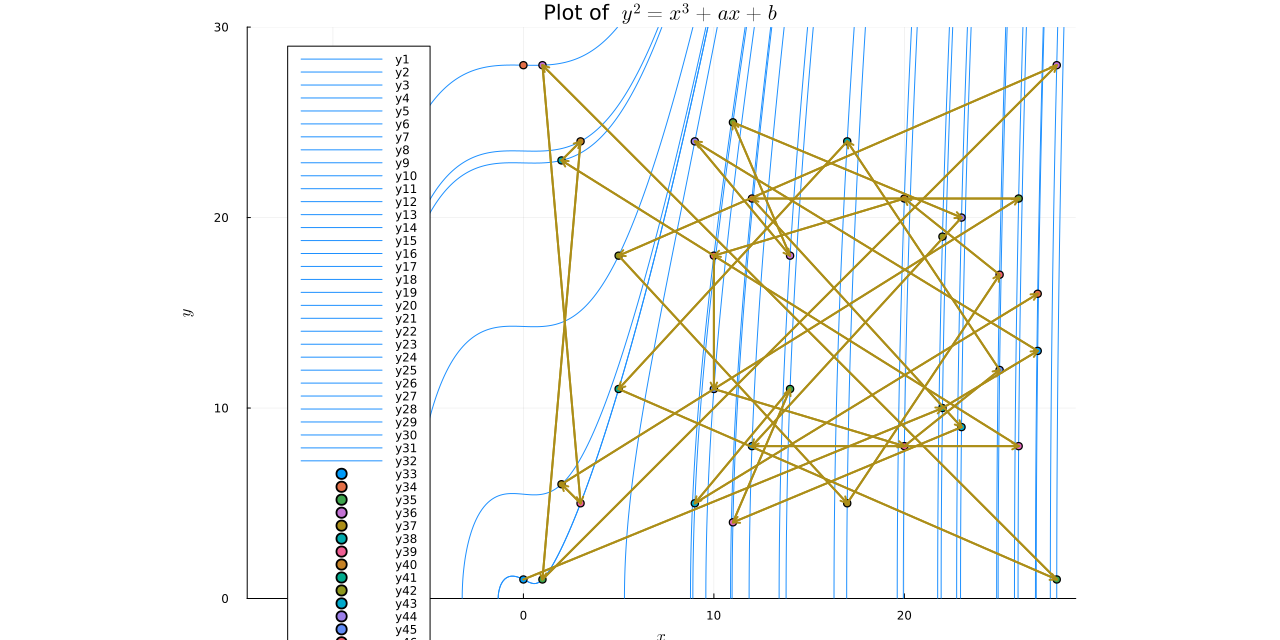

In [305]:
    pp,qq=[0,1],[0,1]
    rplst=GFEllAddChain(pp,qq,plst)
    println(rplst)
    vlst=[]
    for i in 1:length(rplst)-1
        append!(vlst,[[rplst[i],rplst[i+1]]])
    end
#    println(rplst,",",length(rplst))
#    println(vlst)
    GFEllPlot(p,a,b,plst,vlst)

**クラバートの樹** さんの **No.315 - 高校数学で理解する楕円曲線暗号の数理（１）** を確認  
https://hypertree.blog.ss-blog.jp/2021-07-11

p=109, a=2, b=4
Points List :Any[[0, 2], [0, 107], [1, 15], [1, 94], [2, 4], [2, 105], [7, 19], [7, 90], [9, 36], [9, 73], [10, 32], [10, 77], [11, 7], [11, 102], [12, 11], [12, 98], [17, 41], [17, 68], [19, 19], [19, 90], [20, 14], [20, 95], [23, 3], [23, 106], [26, 44], [26, 65], [27, 11], [27, 98], [29, 12], [29, 97], [31, 10], [31, 99], [32, 38], [32, 71], [34, 38], [34, 71], [35, 49], [35, 60], [36, 25], [36, 84], [37, 41], [37, 68], [38, 4], [38, 105], [39, 43], [39, 66], [43, 38], [43, 71], [44, 16], [44, 93], [49, 24], [49, 85], [50, 9], [50, 100], [51, 39], [51, 70], [52, 18], [52, 91], [53, 23], [53, 86], [54, 17], [54, 92], [55, 41], [55, 68], [59, 6], [59, 103], [61, 13], [61, 96], [62, 20], [62, 89], [63, 26], [63, 83], [64, 26], [64, 83], [67, 37], [67, 72], [69, 4], [69, 105], [70, 11], [70, 98], [72, 17], [72, 92], [74, 21], [74, 88], [76, 25], [76, 84], [80, 54], [80, 55], [82, 43], [82, 66], [83, 19], [83, 90], [84, 5], [84, 104], [85, 53], [85, 56], [86, 33], [86, 76

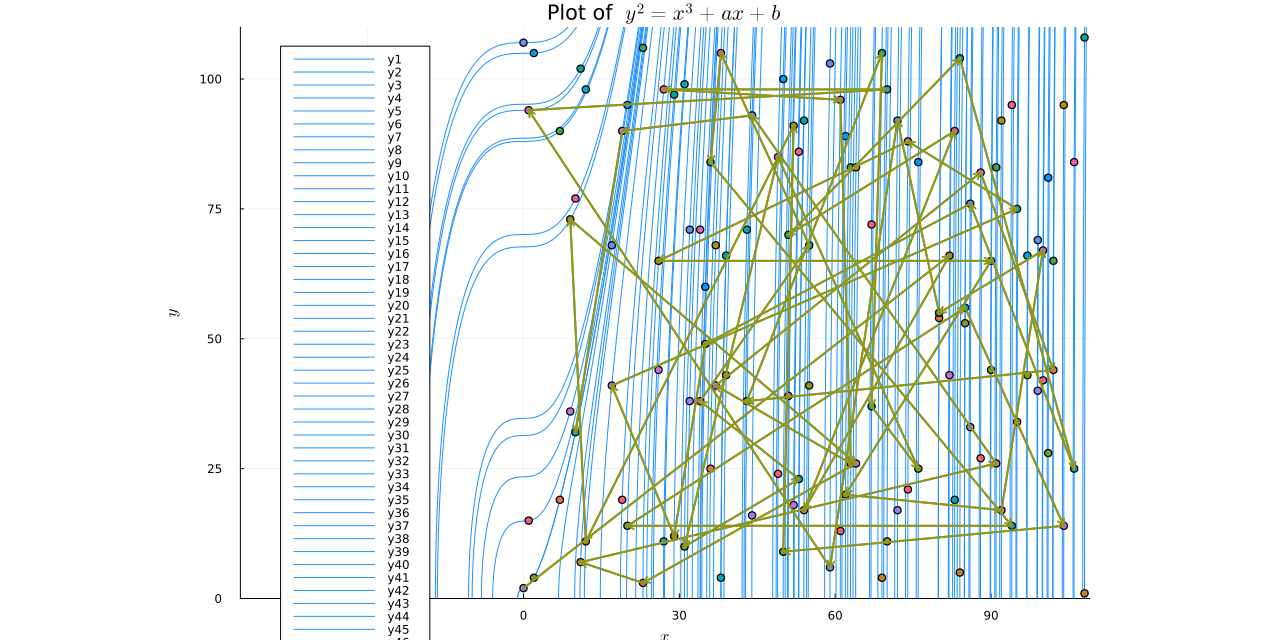

In [310]:
GFEllCurvePoints(109,2,4,[0,2],[0,2])